In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import cycler
import pathlib

from rationality import util as utl

In [2]:
pathlib.Path('figures/').mkdir(parents=True, exist_ok=True)


plt.style.reload_library()
%config InlineBackend.figure_format = 'svg'

noise_scales = [0, 1, 2, 3]
figure_formats = ['png', 'svg', 'pdf', 'pgf']

In [3]:
data = [np.load(f'data_good/noise-scale-coeff-{scale:.2f}.npz') for scale in noise_scales]

inf
6723.357
10826.372
10826.372
Saving PNG format: figures/log-beta-expectation-svmpc.png
Saving SVG format: figures/log-beta-expectation-svmpc.svg
Saving PDF format: figures/log-beta-expectation-svmpc.pdf


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: times


Saving PGF format: figures/log-beta-expectation-svmpc.pgf


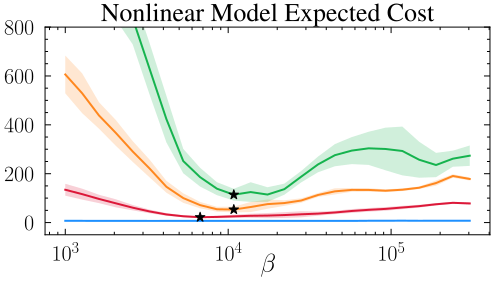

In [4]:
# Weird bug in EPS file if I don't load then unload IEEE mode...
plt.style.use(['science', 'ieee', 'notebook'])
plt.style.use(['science', 'notebook'])

color_cycler = cycler.cycler(color=['#1E90FF', '#DC1839', '#FF871E', '#15B34E'])
plt.rc('text', usetex=True)
plt.rc('font', family='serif', serif='times')
plt.rc('axes', prop_cycle=color_cycler)
plt.rc('text.latex', preamble='\\usepackage{lmodern}\n\\renewcommand{\\rmdefault}{ptm}')

for i, scale in enumerate(noise_scales):
    inv_temps = data[i]['inv_temps']
    cumm_costs = data[i]['svmpc']['costs'].sum(axis=-1)
    mean_cumm_costs = cumm_costs.mean(axis=-1)
    std_cumm_costs = cumm_costs.std(axis=-1)

    upper_bar = cumm_costs.std(axis=-1) #np.percentile(cumm_costs, max_percentile, axis=-1)
    lower_bar = cumm_costs.std(axis=-1) #np.percentile(cumm_costs, min_percentile, axis=-1)

    idx_to_plot = inv_temps > 0 & np.isfinite(inv_temps)
    plt.plot(inv_temps[idx_to_plot][:-6], mean_cumm_costs[idx_to_plot][:-6])
    plt.fill_between(inv_temps[idx_to_plot][:-6],
                           mean_cumm_costs[idx_to_plot][:-6] - upper_bar[idx_to_plot][:-6],
                           mean_cumm_costs[idx_to_plot][:-6] + lower_bar[idx_to_plot][:-6],
                           alpha=0.2)

    beta_star_idx = mean_cumm_costs[idx_to_plot].argmin()
    print(inv_temps[idx_to_plot][beta_star_idx])
    plt.scatter(inv_temps[idx_to_plot][beta_star_idx],
                mean_cumm_costs[idx_to_plot].min(),
                s=100, c='k', marker='*', zorder=3)

plt.ylim([-50, 800])

plt.title(r'\textrm{Nonlinear Model Expected Cost}', fontsize=26)
plt.xlabel('$\\beta$', fontsize=26, labelpad=-11)
plt.xscale('log')

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.gca().set_aspect(0.0015)

for tick in plt.gca().get_xaxis().get_major_ticks():
    tick.set_pad(11)

for tick in plt.gca().get_yaxis().get_major_ticks():
    tick.set_pad(11)

utl.savefig('figures/log-beta-expectation-svmpc', figure_formats)

In [14]:
plt.figure()

width = 0.25
gap = 1
text_pad = 0.1

x = 0

for c, scale in zip(color_cycler, noise_scales):
    plt.plot([x, x + width], [0, 0], **c)
    text = plt.text(x + width + text_pad, 0.0, r'$\sigma_{\hat{x}}^2 = ' + f'{scale}$',
                   fontsize=22, va='center', ha='left')

    x = x + width + text_pad + gap

plt.xlim([0, x])
plt.gca().set_aspect(2)
plt.axis('off')
utl.savefig('figures/legend', figure_formats, pad=0.1)

Saving PNG format: figures/legend.png
Saving SVG format: figures/legend.svg
Saving PDF format: figures/legend.pdf
Saving PGF format: figures/legend.pgf


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


In [5]:
def set_size(w=None, h=None, ax=None):
    """ w, h: width, height in inches """
    if not ax:
        ax = plt.gca()

    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom

    figw = float(w) / (r - l) if w is not None else (r - l)
    figh = float(h) / (t - b) if h is not None else (t - b)

    ax.figure.set_size_inches(figw, figh)


<ipython-input-30-47d4b1432e87>:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(['', '$\infty$', ''])


Saving PNG format: figures/log-beta-expectation-svmpc-with-inf.png
Saving SVG format: figures/log-beta-expectation-svmpc-with-inf.svg
Saving PDF format: figures/log-beta-expectation-svmpc-with-inf.pdf
Saving PGF format: figures/log-beta-expectation-svmpc-with-inf.pgf


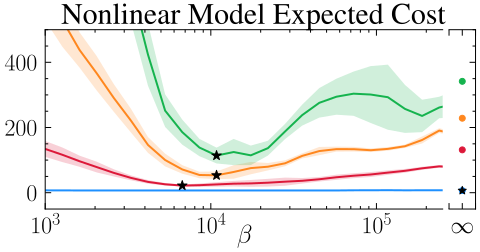

In [30]:
colors = ['#1E90FF', '#DC1839', '#FF871E', '#15B34E']
color_cycler = cycler.cycler(color=colors)

# Weird bug in EPS file if I don't load then unload IEEE mode...
plt.style.use(['science', 'ieee', 'notebook'])
plt.style.use(['science', 'notebook'])

plt.rc('text', usetex=True)
plt.rc('font', family='serif', serif='times')
plt.rc('axes', prop_cycle=color_cycler)
plt.rc('text.latex', preamble='\\usepackage{lmodern}\n\\renewcommand{\\rmdefault}{ptm}')


f, ax = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [15, 1]})

for i, scale in enumerate(noise_scales):
    inv_temps = data[i]['inv_temps']
    cumm_costs = data[i]['svmpc']['costs'].sum(axis=-1)
    mean_cumm_costs = cumm_costs.mean(axis=-1)
    std_cumm_costs = cumm_costs.std(axis=-1)

    upper_bar = cumm_costs.std(axis=-1) #np.percentile(cumm_costs, max_percentile, axis=-1)
    lower_bar = cumm_costs.std(axis=-1) #np.percentile(cumm_costs, min_percentile, axis=-1)

    idx_to_plot = inv_temps > 0 & np.isfinite(inv_temps)
    ax[0].plot(inv_temps[idx_to_plot][:-6], mean_cumm_costs[idx_to_plot][:-6])
    ax[0].fill_between(inv_temps[idx_to_plot][:-6],
                           mean_cumm_costs[idx_to_plot][:-6] - upper_bar[idx_to_plot][:-6],
                           mean_cumm_costs[idx_to_plot][:-6] + lower_bar[idx_to_plot][:-6],
                           alpha=0.2)

    beta_star_idx = mean_cumm_costs[idx_to_plot].argmin()

    ax[0].scatter(inv_temps[idx_to_plot][beta_star_idx],
                mean_cumm_costs[idx_to_plot].min(),
                s=100, c='k', marker='*', zorder=3)

    ax[1].scatter(0.0, mean_cumm_costs[-1])
    ax[1].errorbar(0.0, std_cumm_costs[-1], std_cumm_costs[-1])



# for i, scale in enumerate(noise_coeffs):
#     ax[0].plot(inv_temps, expected_problem_value[:, i])
#     ax[1].scatter(0, lqr_expected_costs[i], s=50)
#
#     if i > 0:
#         ax[0].scatter(best_inv_temps[i], expected_problem_value[:, i].min(), s=70, c='k', marker='*', zorder=3)

ax[0].set_xlim([10 ** 3, 10 ** 5.4])
ax[0].set_ylim([-50, 500])
ax[0].spines['right'].set_visible(False)
ax[0].tick_params(axis='y', which='both', right=False)
ax[0].tick_params(axis='both', which='major', pad=8.0, labelsize=24)
ax[0].set_xscale('log')

ax[1].scatter(0.0, data[0]['svmpc']['costs'].sum(axis=-1).mean(axis=-1)[-1], s=70, c='k', marker='*', zorder=3)
ax[1].set_xlim([-0.5, 0.5])
#ax[1].set_xticks([1.0])
ax[1].set_xticklabels(['', '$\infty$', ''])
ax[1].tick_params(axis='x', which='minor', bottom=False, top=False)
ax[1].tick_params(axis='x', which='major', pad=8.0, labelsize=24)

ax[1].tick_params(axis='y', which='both', left=False)
ax[1].spines['left'].set_visible(False)

set_size(6, 2.5, ax[0])

#ax[0].set_title('Linearized Model Expected Cost', fontsize=30)
ax[0].set_xlabel('$\\beta$', fontsize=26, labelpad=-13)
f.suptitle('Nonlinear Model Expected Cost', fontsize=30, y=0.99)
f.subplots_adjust(wspace=0.03)

utl.savefig('figures/log-beta-expectation-svmpc-with-inf', figure_formats)

array([      0.    ,    1000.    ,    1268.9607,    1610.262 ,
          2043.3602,    2592.9436,    3290.3435,    4175.321 ,
          5298.315 ,    6723.357 ,    8531.676 ,   10826.372 ,
         13738.232 ,   17433.305 ,   22122.166 ,   28072.143 ,
         35622.465 ,   45203.53  ,   57361.53  ,   72789.56  ,
         92367.05  ,  117210.21  ,  148735.22  ,  188739.05  ,
        239502.81  ,  303919.8   ,  385662.06  ,  489390.25  ,
        621016.6   ,  788046.06  , 1000000.    ,          inf],
      dtype=float32)

In [20]:
data[0]['inv_temps']


array([0.00000000e+00, 9.99999939e+02, 1.26896057e+03, 1.61026196e+03,
       2.04336011e+03, 2.59294360e+03, 3.29034351e+03, 4.17531885e+03,
       5.29831543e+03, 6.72335693e+03, 8.53167578e+03, 1.08263721e+04,
       1.37382324e+04, 1.74332871e+04, 2.21221680e+04, 2.80721406e+04,
       3.56224648e+04, 4.52035273e+04, 5.73615312e+04, 7.27895625e+04,
       9.23670469e+04, 1.17210211e+05, 1.48735219e+05, 1.88739062e+05,
       2.39502812e+05, 3.03919500e+05, 3.85662062e+05, 4.89390250e+05,
       6.21016625e+05, 7.88046062e+05, 1.00000006e+06,            inf],
      dtype=float32)